# QUELLE ÉVOLUTION DES PRÊTS AU BIBLIOBUS

In [1]:
import pandas as pd
import seaborn as sns
from datetime import datetime as dt
import matplotlib.pyplot as plt
from kiblib.utils.db import DbConn
from kiblib.utils.evolution_stats import EvolutionActivite
from kiblib.utils import lucas_sns_params
import warnings
warnings.filterwarnings("ignore")

In [2]:
maj = dt.today().strftime('%d-%m-%Y à %Hh%M' )
print(f"Dernière mise à jour le {maj}")

Dernière mise à jour le 09-01-2024 à 10h20


In [3]:
db_conn = DbConn().create_engine()

In [4]:
query = """SELECT issuedate,cardnumber
FROM statdb.stat_issues si 
WHERE branchcode = 'BUS'
AND YEAR(issuedate) >= 2019"""

In [5]:
prets_zebre = pd.read_sql(query,db_conn)

In [6]:
df = EvolutionActivite(df=prets_zebre,df_subject='prets_zebre',text='prets dans le bus')

In [7]:
df.add_columns()

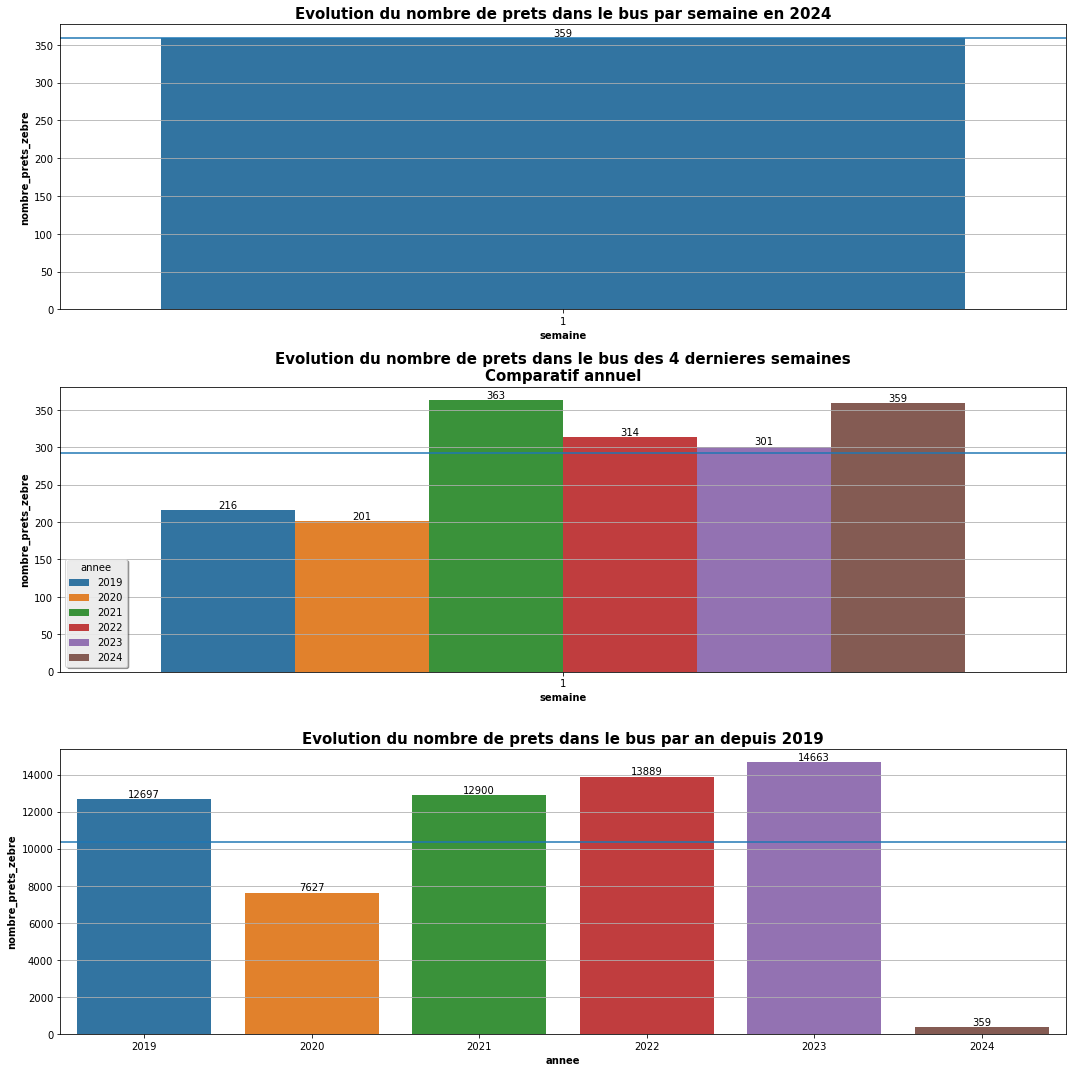

In [8]:
df1 = df.evolution_byweek_thisyear()
df2 = df.evolution_4lastweek()
df3 = df.evolution_by_year()
df4 = df.distinct_evolution_byweek_thisyear()
df5 = df.distinct_evolution_4lastweek()
df6 = df.distinct_evolution_by_year()
#Début des graphiques
f,ax = plt.subplots(nrows=3,ncols=1,figsize=(15,15))
#1er graphique
sns.barplot(data=df1,x='semaine',y='nombre_prets_zebre',ax=ax[0])
ax[0].axhline(y=df1["nombre_prets_zebre"].mean())
ax[0].set_title(df.titre_graph1())
for i in ax[0].containers:
    ax[0].bar_label(i,)
#2e graphique
sns.barplot(data=df2,x='semaine',y='nombre_prets_zebre',hue='annee',ax=ax[1])
ax[1].axhline(y=df2["nombre_prets_zebre"].mean())
ax[1].set_title(df.titre_graph2())
for i in ax[1].containers:
    ax[1].bar_label(i,)
    
sns.barplot(data=df3,x='annee',y='nombre_prets_zebre',ax=ax[2])
ax[2].axhline(y=df3['nombre_prets_zebre'].mean())
ax[2].set_title(df.titre_graph3())
for i in ax[2].containers:
    ax[2].bar_label(i,)

f.tight_layout()

# Nombre de personnes distinctes

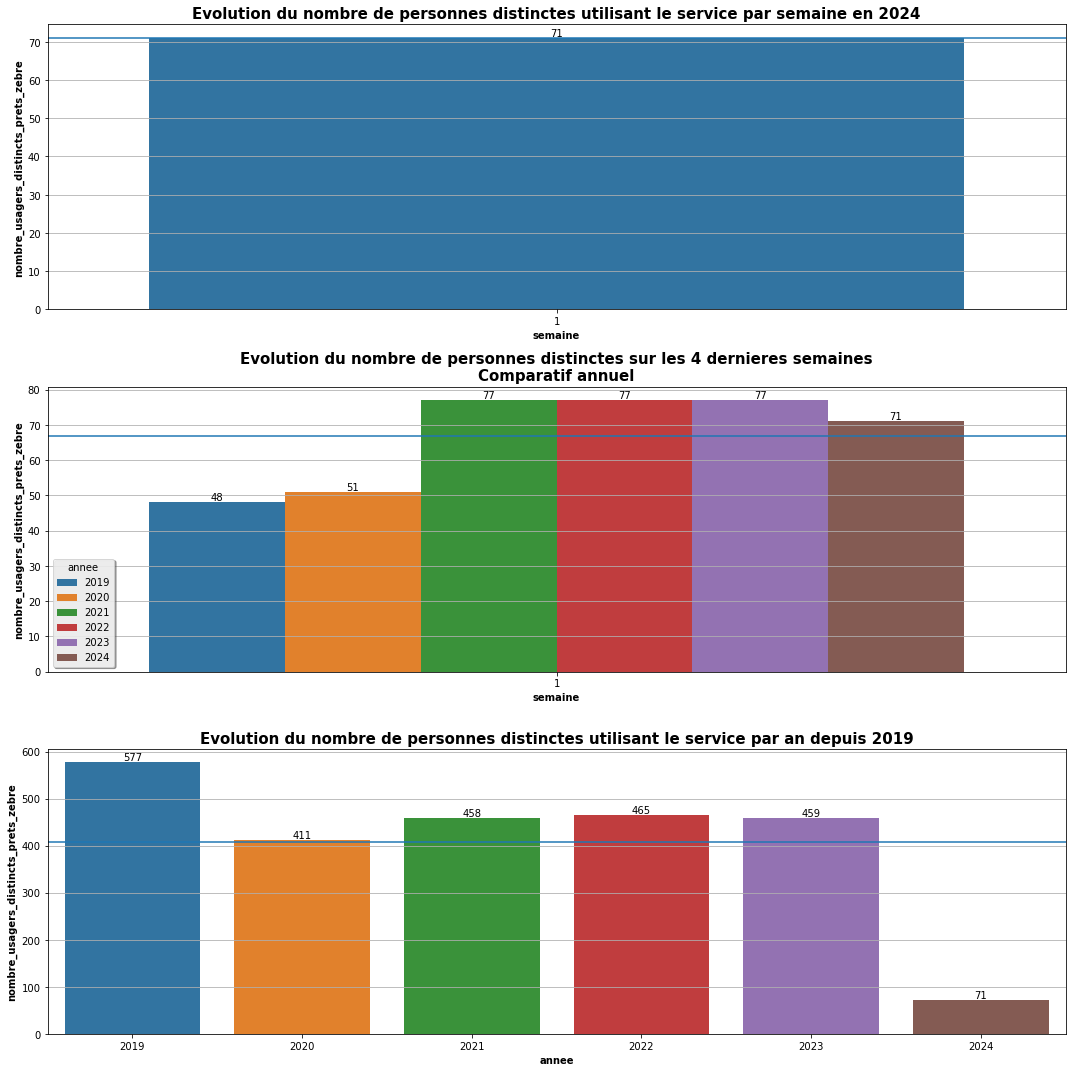

In [9]:
f,ax = plt.subplots(nrows=3,ncols=1,figsize=(15,15))

sns.barplot(data=df4,x='semaine',y='nombre_usagers_distincts_prets_zebre',ax=ax[0])
ax[0].axhline(y=df4["nombre_usagers_distincts_prets_zebre"].mean())
ax[0].set_title(df.titre_graph4())
for i in ax[0].containers:
    ax[0].bar_label(i,)

sns.barplot(data=df5,x='semaine',y='nombre_usagers_distincts_prets_zebre',hue='annee',ax=ax[1])
ax[1].axhline(y=df5["nombre_usagers_distincts_prets_zebre"].mean())
ax[1].set_title(df.titre_graph5())
for i in ax[1].containers:
    ax[1].bar_label(i,)
    
sns.barplot(data=df6,x='annee',y='nombre_usagers_distincts_prets_zebre',ax=ax[2])
ax[2].axhline(y=df6["nombre_usagers_distincts_prets_zebre"].mean())
ax[2].set_title(df.titre_graph6())
for i in ax[2].containers:
    ax[2].bar_label(i,)

f.tight_layout()